<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/044_machine_learning/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №2

Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.<br>
— цена продажи (SalePrice, зависимая переменная),<br>
— наземная жилая зона (GrLivArea),<br>
— общее качество (Overall Quality),<br>
— территория гаража (GarageArea),<br>
— условия сделки (SaleCondition).<br>
Реализуйте построение модели линейной регрессии на этих данных.<br> Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.


---



Решение. Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Получаем данные.

In [2]:
data = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/6057149/attachment/dcab3617fbc87c12cb7c8aa32e38c163.csv')

В условия задачи не входил EDA, поэтому просто убедимся, что пустых значений нет

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [4]:
data.describe()

,SalePrice,GrLivArea,GarageArea,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,472.980137,6.099315
std,79442.502883,525.480383,213.804841,1.382997
min,34900.000000,334.000000,0.000000,1.000000
25%,129975.000000,1129.500000,334.500000,5.000000
50%,163000.000000,1464.000000,480.000000,6.000000
75%,214000.000000,1776.750000,576.000000,7.000000
max,755000.000000,5642.000000,1418.000000,10.000000


In [5]:
data.head(3)

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal


Применим бинарное кодирование (One-hot encoding).

In [7]:
data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [8]:
data_encoded = pd.get_dummies(data, columns=['SaleCondition'])

In [9]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [10]:
data_encoded = pd.get_dummies(data_encoded, columns=['Street'])

Разобъем датасет на тренировочную и тестовую части

In [11]:
columns = list(data_encoded.columns)
columns.remove('SalePrice')

In [12]:
train, test = train_test_split(data_encoded, test_size=0.2, random_state=42)

In [13]:
X = train[columns]
y = train['SalePrice']

In [15]:
X.head(3)

,GrLivArea,GarageArea,OverallQual,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Grvl,Street_Pave
254,1314,294,5,False,False,False,False,True,False,False,True
1066,1571,380,6,False,False,False,False,True,False,False,True
638,796,0,5,False,False,False,False,True,False,False,True


Обучим модель

In [16]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Коэффициенты..

In [17]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -74929.23283047415
Coefficients: [    46.93320579     68.43553598  26369.9518525  -11422.45460962
  -1677.57545679  16178.58546214 -21402.41313217  -3364.08653189
  21687.94426832   7437.27457043  -7437.27457043]


Посмотрим на качество работы модели: сравним предсказанные величины с фактическими для учебных данных

In [19]:
train_X = train[columns]
train_y = train['SalePrice']
train_predictions = model.predict(train_X)

In [20]:
mse = mean_squared_error(train_y, train_predictions)
mae = mean_absolute_error(train_y, train_predictions)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 1550129089.6633768
RMSE: 39371.67877629016
MAE: 26178.705833045602


Результаты так себе..<br>
 Величину 1550129089.6633768 можно интерпретировать как
 средняя ошибка в $39371 при средней цене дома 180921<br>
 Т.е. около 20%

Посмотрим работу модели на тестовых данных

In [22]:
test_X = test[columns]
test_y = test['SalePrice']
test_predictions = model.predict(test_X)

In [23]:
mse = mean_squared_error(test_y, test_predictions)
mae = mean_absolute_error(test_y, test_predictions)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 1764817019.8074448
RMSE: 42009.72530030927
MAE: 27253.18017872845


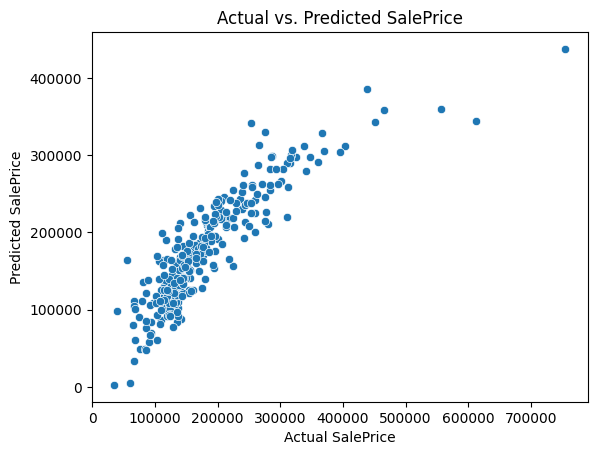

In [24]:
sns.scatterplot(x=test_y, y=test_predictions)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()

Результаты того же уровня: плохие.<br>
Попадание прогнозов более-менее работает в диапазоне цен 100-200 тыс.<br>
Объяснить это можно большим разбросом в данных:

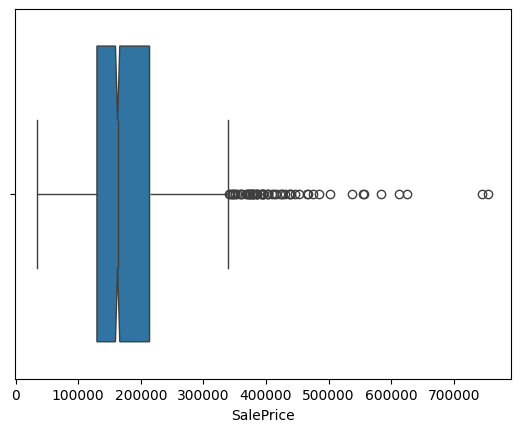

In [25]:
boxplot = sns.boxplot(x=data['SalePrice'], notch=True)
plt.show()

Попробуем отбросить данные для домов дороже 300 тыс. - сделаем для них отдельную модель

In [35]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [36]:
filtered_data = remove_outliers_iqr(data_encoded, 'SalePrice')

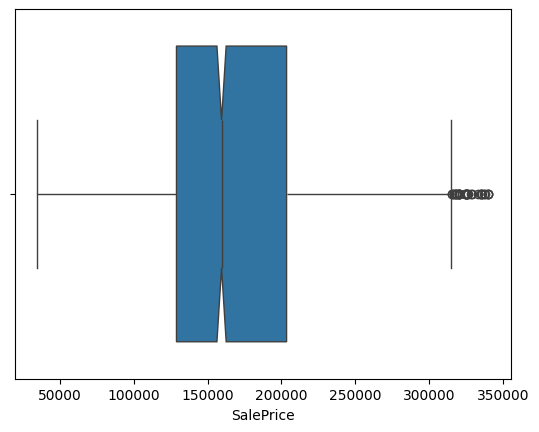

In [37]:
boxplot = sns.boxplot(x=filtered_data['SalePrice'], notch=True)
plt.show()

In [38]:
train, test = train_test_split(filtered_data, test_size=0.2, random_state=42)
X = train[columns]
y = train['SalePrice']
model = LinearRegression()
model.fit(X, y)

train_X = train[columns]
train_y = train['SalePrice']
train_predictions = model.predict(train_X)

test_X = test[columns]
test_y = test['SalePrice']
test_predictions = model.predict(test_X)

In [39]:
mse = mean_squared_error(train_y, train_predictions)
mae = mean_absolute_error(train_y, train_predictions)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 969886518.1759056
RMSE: 31143.001110617224
MAE: 22287.42183364399


In [40]:
mse = mean_squared_error(test_y, test_predictions)
mae = mean_absolute_error(test_y, test_predictions)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 732595719.4727029
RMSE: 27066.505490600422
MAE: 20650.616053116675


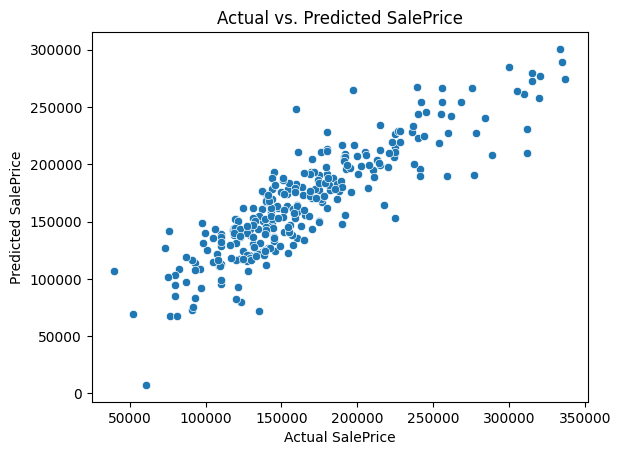

In [41]:
sns.scatterplot(x=test_y, y=test_predictions)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()

Результаты прогноза улучшились. <br>
Их можно улучишь еще, разобравшись в причинах выбросов в предсказаниях<br>

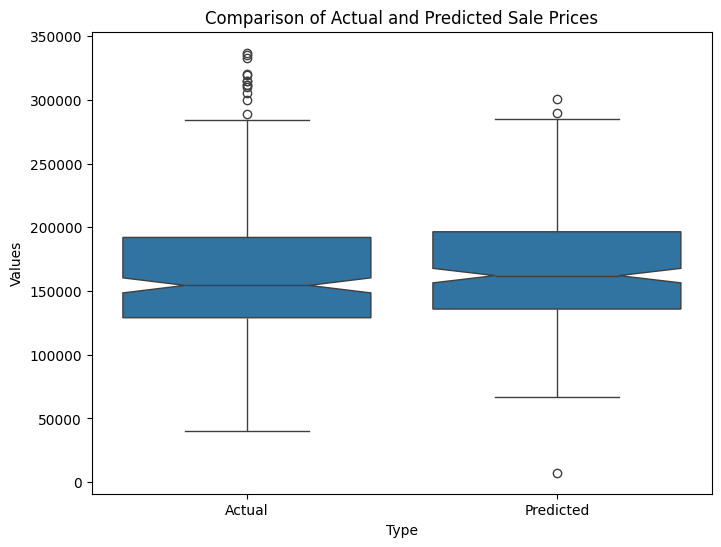

In [43]:
results_df = pd.DataFrame({
    'Values': list(test_y) + list(test_predictions),
    'Type': ['Actual'] * len(test_y) + ['Predicted'] * len(test_predictions)
})

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='Type', y='Values', data=results_df, notch=True)
plt.title("Comparison of Actual and Predicted Sale Prices")
plt.show()

И далее можно искать комбинацию факторов, дающих наилучший результат.